In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nepes = pd.read_csv('../../뉴스 데이터/AI 종목/네패스 주식 데이터.csv', encoding='cp949')

In [11]:
nepes = nepes.drop(columns = '종목명')
nepes = nepes.drop(columns = '종목코드')
nepes = nepes.drop(columns = '개인')
nepes = nepes.drop(columns = '오')
nepes = nepes.drop(columns = '종목명')
nepes = nepes.drop(columns = '종목명')
nepes = nepes.drop(columns = '종목명')
nepes = nepes.drop(columns = '종목명')
nepes = nepes.drop(columns = '종목명')


KeyError: "['종목명'] not found in axis"

In [5]:
nepes

,종목코드,종목명,날짜,개인,외국인,기관계,금융투자,보험,투신,은행,기타금융,연기금,기타법인,기타외인,사모펀드
0,A033640,네패스,20220624,-101039,46594,58598,45277,1251,402,0,0,11465,-4011,-142,203
1,A033640,네패스,20220623,-67615,38297,33623,24536,1226,-1116,0,0,8935,-4114,-191,42
2,A033640,네패스,20220628,50479,-30583,-19993,-18480,-2148,781,0,0,120,96,1,-266
3,A033640,네패스,20220627,46130,-31191,-15127,-13563,-2148,821,0,0,0,189,-1,-237
4,A033640,네패스,20220630,38418,-19543,-20205,-20938,19,1104,0,0,0,1350,-20,-390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,A033640,네패스,20230619,29152,-25799,-3337,-3118,0,-262,0,0,24,-748,732,19
245,A033640,네패스,20230621,115185,-84135,-35742,-16265,0,-21556,0,0,-861,3013,1679,2940
246,A033640,네패스,20230620,19851,-15662,-5440,-9450,0,0,0,0,0,1050,201,4010
247,A033640,네패스,20230623,49970,-46478,-5029,-1674,0,8,0,0,-3363,414,1123,0


In [4]:
hi = hi.drop(columns = '누적체결매도수량')
hi = hi.drop(columns = '누적체결매수수량')
hi = hi.drop(columns = '종목코드')
hi = hi.drop(columns = '종목명')
hi = hi.drop(columns = '시간')
hi = hi.drop(columns = '거래대금')

KeyError: "['누적체결매도수량'] not found in axis"

In [5]:
hi.set_index('날짜',inplace=True)

In [6]:
hi

,시가,고가,저가,종가,거래량
날짜,,,,,
20210616,128000.0,128500.0,127500.0,127500.0,30265.0
20210616,127500.0,128000.0,127500.0,127500.0,31521.0
20210616,127500.0,128000.0,127500.0,128000.0,32558.0
20210616,128000.0,128000.0,127500.0,128000.0,34810.0
20210616,128000.0,128000.0,127500.0,127500.0,88528.0
...,...,...,...,...,...
20230623,113600.0,113700.0,113500.0,113700.0,1239811.0
20230623,113600.0,113900.0,113600.0,113600.0,1249310.0
20230623,113700.0,113800.0,113600.0,113700.0,1252913.0


In [7]:
print(hi.shape)

(190379, 5)


In [8]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

hi = MinMaxScaler(hi)

In [9]:
dfx = hi[['시가','고가','저가','종가', '거래량']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
dfx = dfx[['시가','고가','저가', '거래량']]
dfx

,시가,고가,저가,거래량
날짜,,,,
20210616,0.901478,0.909241,0.900662,0.002685
20210616,0.893268,0.900990,0.900662,0.002796
20210616,0.893268,0.900990,0.900662,0.002889
20210616,0.901478,0.900990,0.900662,0.003089
20210616,0.901478,0.900990,0.900662,0.007865
...,...,...,...,...
20230623,0.665025,0.665016,0.668874,0.110233
20230623,0.665025,0.668317,0.670530,0.111077
20230623,0.666667,0.666667,0.670530,0.111398


In [10]:
dfy

,종가
날짜,
20210616,0.900662
20210616,0.900662
20210616,0.908940
20210616,0.908940
20210616,0.900662
...,...
20230623,0.672185
20230623,0.670530
20230623,0.672185


In [11]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [12]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.10883529909356626], [0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.10905252048893334], [0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.1092435117117121], [0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.10932353596706632], [0.660098456157642, 0.6617161054455512, 0.6655628473510001, 0.10951728358086282], [0.6633825280788244, 0.6633662702970363, 0.66721847632451, 0.10986209920560025], [0.6650245640394155, 0.6650164351485216, 0.66887410529802, 0.11023261150789031], [0.6650245640394155, 0.6683167648514918, 0.67052973427153, 0.1110772230652345], [0.6666666000000065, 0.6666666000000067, 0.67052973427153, 0.11139758683416925], [0.6666666000000065, 0.6666666000000067, 0.67052973427153, 0.11163650369432124]] -> [0.67052973427153]


In [13]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 190369 190369


In [14]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (133258, 10, 4) (133258, 1)
테스트 데이터의 크기 : (57111, 10, 4) (57111, 1)


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [16]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=10, batch_size=32)
pred_y = model.predict(test_X)

Epoch 1/10
4165/4165 [==============================] - 529s 126ms/step - loss: 0.0046
Epoch 2/10
4165/4165 [==============================] - 518s 124ms/step - loss: 9.5732e-04
Epoch 3/10
4165/4165 [==============================] - 495s 119ms/step - loss: 9.2542e-04
Epoch 4/10
4165/4165 [==============================] - 491s 118ms/step - loss: 8.2911e-04
Epoch 5/10
4165/4165 [==============================] - 462s 111ms/step - loss: 8.1696e-04
Epoch 6/10
4165/4165 [==============================] - 424s 102ms/step - loss: 7.9110e-04
Epoch 7/10
4165/4165 [==============================] - 422s 101ms/step - loss: 7.6783e-04
Epoch 8/10
4165/4165 [==============================] - 413s 99ms/step - loss: 7.5772e-04
Epoch 9/10
4165/4165 [==============================] - 479s 115ms/step - loss: 7.5954e-04
Epoch 10/10
1785/1785 [==============================] - 24s 13ms/step


1785/1785 [==============================] - 21s 12ms/step


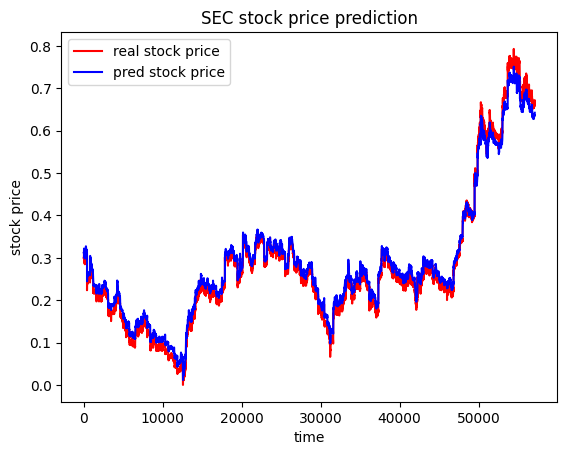

KeyError: -1

In [19]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='pred stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", dfy.종가[-1] * pred_y[-1] / dfy.종가[-1], 'KRW')

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
    
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)


Mean Squared Error: 0.0002996063685368758
Mean Absolute Error: 0.015977400702615017
Root Mean Square Error: 0.017309141184266647
